# 0.0 INTRODUCTION

This project adresses a fictional company, called House Rocket, that works reselling properties in King County (WA).

The company's CEO wants to increase their profits for the next year, so they asked to create a analysis based on a business scenario that he brought.

## 0.1 Business Scenario

1. The House Rocket's CEO wants to know which houses the company shall buy and them prices

2. The CEO also wants to know when the company shall sell them and for what price

3. Should House Rocket do a house renovation to raise the sale price? What could be the renovation suggestions? How much is the price incresing for each renovation option?

## 0.2 Hypothesis

These topics are created to help solve the questions

1. Waterfront properties  are 20% more expansive, on average.
2. Properties with built year prior to 1955 are 50% cheaper, on average.
3. Properties without a basement are 40% bigger than the properties with basement.
4. The YoY (Year over Year) price is increasing in 10%.
5. Properties with 3 bathrooms have a MoM (Month over Month) price increasing in 15%. 
6. Properties sell 20% more in summer than in winter.
7. In the winter, properties prices tend to be 20% lower than in summer
8. The number of bedrooms and bathrooms of a property has more effect on price than its total living area 
9. Properties with a smaller living area than the other 15 properties closest to it have their price 10% lower than the median price for their region
10. Properties renovated after 2005 have their prices higher than the properties which were renovated before 2005 or than have never been renovated

# 1.0 IMPORT DATA

In [922]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from datetime import datetime
from matplotlib import gridspec
from IPython.display import Image
from IPython.display import HTML 

## 1.1 Functions

In [923]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 25
    #display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

def sc_notation_off():
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    return None

jupyter_settings()
sc_notation_off()

## 1.2 Extraction

In [924]:
df_raw = pd.read_csv("kc_house_data.csv")

In [925]:
df_raw.sample(10).T

,36,13619,5734,3173,19607,8009,2940,9714,10869,18297
id,9435300030,253600180,2921079027,8651511220,4024100915,3723800097,1494300110,225079036,5152000030,546000245
date,20140528T000000,20150203T000000,20140924T000000,20141217T000000,20141231T000000,20141211T000000,20140603T000000,20150107T000000,20150204T000000,20140716T000000
price,550000.0,427500.0,400000.0,490000.0,689000.0,476500.0,550000.0,937500.0,305000.0,549900.0
bedrooms,4,4,4,3,4,4,4,4,5,3
bathrooms,1.0,2.5,2.5,2.5,2.8,1.8,2.5,4.0,2.5,1.5
sqft_living,1660,2010,2170,1890,3250,1670,2170,5545,2500,1380
sqft_lot,34848,6294,204296,10190,10000,10200,9600,871200,12220,3031
floors,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5
waterfront,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0


# 2.0 TRANSFORM DATA

In [926]:
df1 = df_raw.copy()

## 2.1 Data description

In [927]:
# printing the number of rows and the number of columns with the format() method 
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 21613
Number of columns: 21


## 2.1 Data types

In [928]:
# date is object
# must change the date type
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 2.2 Check NA

In [929]:
# there are 2 'NA' values in 'sqft_above' column
df1.isna().sum().sort_values(ascending=False)

sqft_above       2
id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

## 2.4 Fillout NA

In [930]:
NA_prop = df1[df1['sqft_above'].isna()]
display(NA_prop)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,2015-04-03,662500.0,3,2.5,3560,9796,1.0,0,0,3,8,NaN,1700,1965,0,98007,47.6,-122.1,2210,8925
17,6865200140,2014-05-29,485000.0,4,1.0,1600,4300,1.5,0,0,4,7,NaN,0,1916,0,98103,47.7,-122.3,1610,4300


The sqft_above 'NA' data belongs to the properties in index 10 and 17

Since the sqft_living value is the sum of sqft_basement and sqft_above, the 'NA' values can be filled.

In this case, the math operation will be done for the entire column

In [931]:
df1['sqft_above'] = df1['sqft_living'] - df1['sqft_basement']

In [932]:
# check the if the 'NA' values were filled with the correct values
df1[['id','sqft_living','sqft_basement','sqft_above']].iloc[[10,17]]

,id,sqft_living,sqft_basement,sqft_above
10,1736800520,3560,1700,1860
17,6865200140,1600,0,1600


## 2.5 Descriptive statistical

- Central tendency: average, median
- Dispersion: variance, standard deviation, amplitude

This analysis will be made for the whole data, dividing it into numerical and categorical attributes

In [933]:
attributes = df1.select_dtypes(exclude=['datetime'])

In [934]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

range_metric = pd.DataFrame(attributes.apply(lambda x: x.max()-x.min()).T.reset_index())
range_metric.columns = ['attributes','range']


metrics = attributes.agg(['mean','median','std','skew','kurtosis','min','max']).T.reset_index()
metrics.columns = ['attributes','mean','median','std','skew','kurtosis','min','max']
metrics = pd.merge(metrics, range_metric,how='inner',on='attributes')
metrics

,attributes,mean,median,std,skew,kurtosis,min,max,range
0,id,4580301520.9,3904930410.0,2876565571.3,0.2,-1.3,1000102.0,9900000190.0,9899000088.0
1,price,540088.1,450000.0,367127.2,4.0,34.6,75000.0,7700000.0,7625000.0
2,bedrooms,3.4,3.0,0.9,2.0,49.1,0.0,33.0,33.0
3,bathrooms,2.1,2.2,0.8,0.5,1.3,0.0,8.0,8.0
4,sqft_living,2079.9,1910.0,918.4,1.5,5.2,290.0,13540.0,13250.0
5,sqft_lot,15107.0,7618.0,41420.5,13.1,285.1,520.0,1651359.0,1650839.0
6,floors,1.5,1.5,0.5,0.6,-0.5,1.0,3.5,2.5
7,waterfront,0.0,0.0,0.1,11.4,127.6,0.0,1.0,1.0
8,view,0.2,0.0,0.8,3.4,10.9,0.0,4.0,4.0
9,condition,3.4,3.0,0.7,1.0,0.5,1.0,5.0,4.0


The table above gives an idea of the tendency and dispersion of data

Some points:
- Minimum number of bathrooms and bedrooms is 0
- Range of number of bedrooms is 33


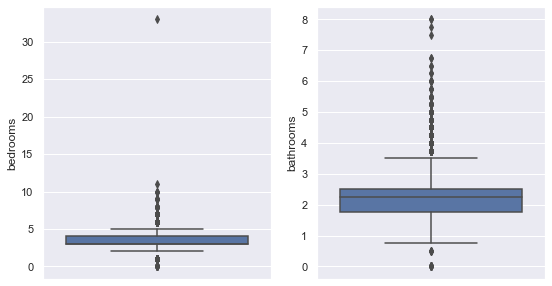

In [935]:
# bedrooms and bathrooms quantity boxplot
fig = plt.figure(figsize=(9,5))

specs = gridspec.GridSpec(nrows=1,ncols=2, figure=fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1])


sns.boxplot(y=attributes['bedrooms'], ax=ax1);
sns.boxplot(y=attributes['bathrooms'], ax=ax2);

In [936]:
# check the data with 0 as number of bedrooms and bathrooms

df1[(df1['bedrooms']==0) | (df1['bathrooms']==0)][['id','bedrooms','bathrooms','sqft_living']]

,id,bedrooms,bathrooms,sqft_living
875,6306400140,0,0.0,3064
1149,3421079032,1,0.0,670
3119,3918400017,0,0.0,1470
3467,1453602309,0,1.5,1430
4868,6896300380,0,1.0,390
5832,5702500050,1,0.0,600
6994,2954400190,0,0.0,4810
8477,2569500210,0,2.5,2290
8484,2310060040,0,2.5,1810
9773,3374500520,0,0.0,2460


As an assumption of this project, the data above will be considered outlier

In [937]:
# filtering properties with the number of bedrooms or bathrooms greater than 0 
df1 = df1[(df1['bedrooms']!=0) | (df1['bathrooms'] != 0)]

The data of number of rooms must be proportional to the value of the living area. Thus, it can be a hint of whether or not the high number of bedrooms are data with typo 

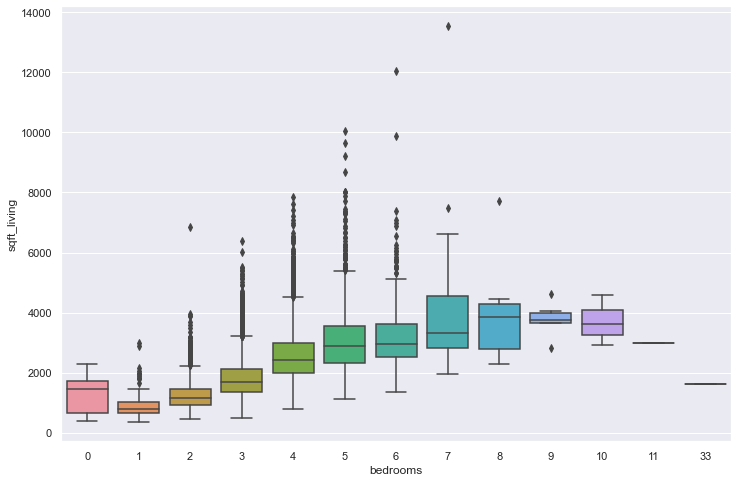

In [938]:
# plotting number bedrooms > 5 (outlier points) x living area
plt.figure(figsize=(12,8))
sns.boxplot(x = df1['bedrooms'], y = df1['sqft_living']);

Since the property with 33 bedrooms doesn't tend to have a bigger living area, it will be considered an outlier as well

In [939]:
# checking 
df1.loc[df1['bedrooms']==33,'bedrooms'] 

15870    33
Name: bedrooms, dtype: int64

In [940]:
# replacing the value of bedrooms = 33 by the median of bedrooms data

df1.loc[df1['bedrooms']==33,'bedrooms'] = df1['bedrooms'].median()

## 2.6 Features

In this section, all features are created based on hypotheses validation and the business scenario solving.

In [941]:
# Date features

# month-day column
df1['month-day'] = df1['date'].dt.strftime('%m-%d')

# Year seasons
df1['season_year'] = df1['month-day'].apply(lambda x: 'summer' if x >= '06-21' and x < '09-22' else     
                                                      'fall' if x >= '09-22' and x < '12-21' else 
                                                      'spring' if x >= '03-20' and x < '06-20' else
                                                      'winter')

# year column
df1['year'] = df1['date'].dt.year

# month column
df1['month'] = df1['date'].dt.strftime('%Y-%m')
 

In [942]:
# Numeric features
 
# median price of the region
price_reg_grouped = df1[['price','zipcode']].groupby('zipcode').median().reset_index()
m1 = df1.merge(price_reg_grouped, on=['zipcode'], validate='many_to_one', how='inner')

# median price of region by season
price_regssn_grouped = m1[['price_x','season_year', 'zipcode']].groupby(['zipcode','season_year']).median().reset_index()
m2 = m1.merge(price_regssn_grouped, on=['zipcode','season_year'],validate= 'many_to_one', how='inner')


m2.columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month-day',
       'season_year', 'year', 'month', 'median_price', 'median_s_price']



df1 = m2.copy()

# sqft_living - sqft_living15 
df1['sqft_diff15_num'] = df1.apply(lambda x: x['sqft_living'] - x['sqft_living15'], axis = 1)


In [943]:
# Categoric features

# sqft_living - sqft_living15 (True if the difference is negative. False if the difference is positive)
df1['sqft_diff15_cat'] = df1.apply(lambda x: True if x['sqft_diff15_num'] < 0 else False, axis = 1)


# yr_built prior to 1955 (0: built prior to 1955 | 1: built after 1955)
df1['built_prior_1955'] = df1['yr_built'].apply(lambda x: '< 1955' if x < 1955 else '> 1955')

# properties with/without basement column
df1['has_basement'] = df1['sqft_basement'].apply(lambda x: 'with basement' if x > 0 else 'without basement')

# properties with 3 bathrooms or more (yes: number of bathrooms >= 3, no: < 3)
df1['bathrooms3'] = df1['bathrooms'].apply(lambda x: '>= 3' if x >= 3 else '< 3')

# properties renovated after 2005
df1['renovated_after_2005'] = df1['yr_renovated'].apply(lambda x:  '< 2005' if x < 2005 else 
                                                                   'never renovated' if x == 0 else '> 2005')
                                                            
# renovation space (0: no space, 1: has space)
df1['renovation_space'] = df1.apply(lambda x: x['sqft_lot']-x['sqft_living'], axis=1)


# 3.0 EXPLORATORY DATA ANALYSIS

All the hypothesis descriptived in section 0.2 will be validated or refutade in this section

In [944]:
df2 = df1.copy()

## 3.1 Hypotheses

### H1. Waterfront properties  are 20% more expansive, on average.

**True**

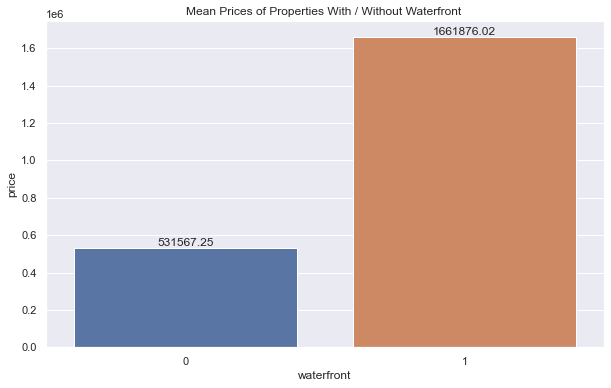

Waterfront properties are 212.64% more expansive, on average


In [945]:
# creating the mean measures in a dataframe
aux = df2[['price','waterfront']].groupby('waterfront').mean().reset_index()

# plotting the barplot
plt.figure(figsize=(10,6))
fig = sns.barplot(x= aux['waterfront'], y= aux['price'], ci=None);
fig.bar_label(container = fig.containers[0],fmt="%.2f")
fig.set(title='Mean Prices of Properties With / Without Waterfront ')
plt.show()

# creating the percentage measure
measure = (((aux.loc[1,'price'])/(aux.loc[0,'price']))-1)*100

print('Waterfront properties are {}% more expansive, on average'.format(round(measure,2)))


### H2. Properties with built year prior to 1955 are 50% cheaper, on average.


**False**

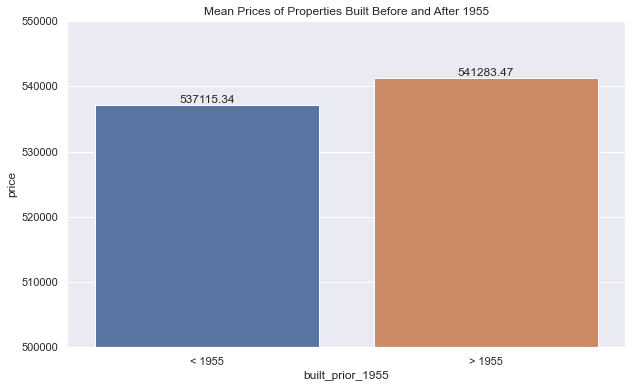

Properties that were built prior to 1955 are 0.77% cheaper, on average


In [946]:
# creating the mean measures in a dataframe
aux = df2[['price','built_prior_1955']].groupby('built_prior_1955').mean().reset_index()

# plotting the barplot
plt.figure(figsize=(10,6))
fig = sns.barplot(x= aux['built_prior_1955'], y= aux['price'], estimator=np.mean, ci=None);
fig.bar_label(container = fig.containers[0],fmt="%.2f")
fig.set(title='Mean Prices of Properties Built Before and After 1955')
fig.set_ylim([500000,550000])
plt.show()

# creating the percentage measure
measure = (1-(aux.loc[0,'price'])/(aux.loc[1,'price']))*100

print('Properties that were built prior to 1955 are {}% cheaper, on average'.format(round(measure,2)))

### H3. Properties without a basement are 40% bigger than the properties with basement.


**False**

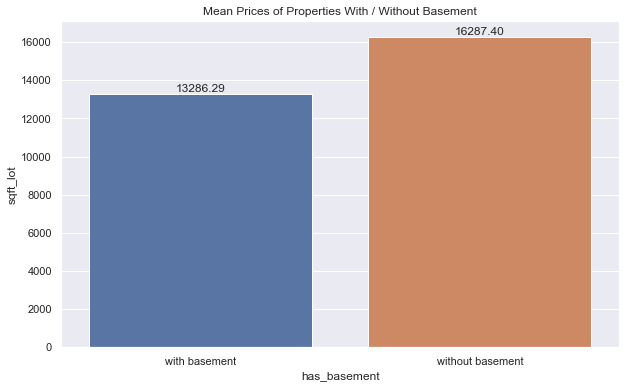

Properties are 22.59% bigger, on average


In [947]:
# creating the mean measures in a dataframe
aux = df2[['has_basement','sqft_lot']].groupby('has_basement').mean().reset_index()

# plotting the barplot
plt.figure(figsize=(10,6))
fig = sns.barplot(x= aux['has_basement'], y= aux['sqft_lot'], ci=None);
fig.bar_label(container = fig.containers[0],fmt="%.2f")
fig.set(title='Mean Prices of Properties With / Without Basement')
plt.show()

# creating the percentage measure
measure = ((aux.loc[1,'sqft_lot'])/(aux.loc[0,'sqft_lot'])-1)*100

print('Properties are {}% bigger, on average'.format(round(measure,2)))

### H4. The YoY (Year over Year) price is increasing in 10%.

**False**

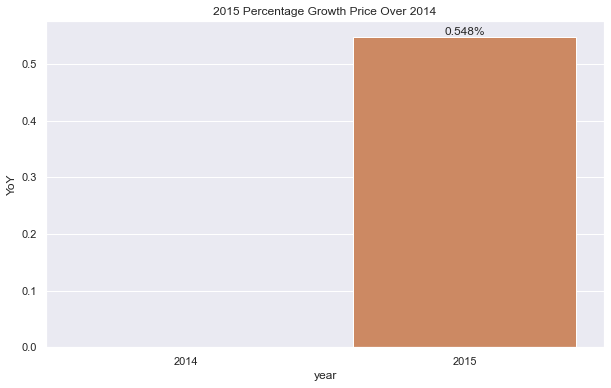

In [948]:
# creating a mean measure in a dataframe
aux = df2[['year','price']].groupby('year').mean().reset_index()

# creating a percentage change column using .pct_change() function
aux['YoY'] = aux['price'].pct_change()

# plotting the barplot
plt.figure(figsize=(10,6))
fig = sns.barplot(x= aux['year'], y= aux['YoY']*100, estimator=np.mean, ci=None);
fig.bar_label(container = fig.containers[0],fmt="%.3f%%")
fig.set(title='2015 Percentage Growth Price Over 2014')
plt.show()


### H5. Properties with 3 bathrooms or more have a MoM (Month over Month) price increasing in 15%, on average.


**False**. The MoM price has never reached 15% since the beggining of the data time. Thus, the average MoM increasing price is 1.66%, on average.
- Max MoM percentage: 13.3%



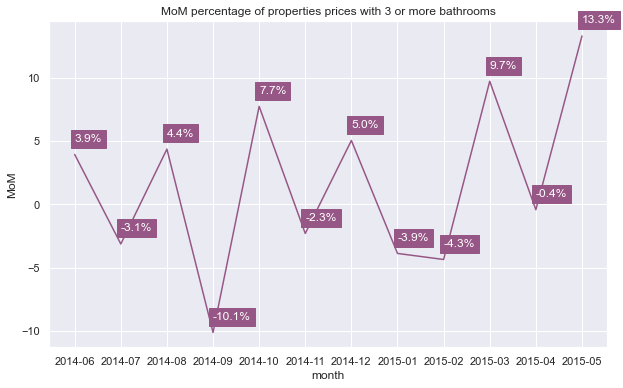

This properties price are increasing 1.66%, on average


In [949]:
# creating a mean measure in a dataframe
aux = df2[df2['bathrooms3'] == '>= 3'][['bathrooms3','month','price']].groupby('month').mean().reset_index()

# creating a percentage change column using .pct_change() function
aux['MoM'] = aux['price'].pct_change()*100


plt.figure(figsize=(10,6))
fig = sns.lineplot(x= aux['month'], y= aux['MoM'], markers='O', color='#965786')
fig.set(title='MoM percentage of properties prices with 3 or more bathrooms');

# label points on the plot
for x, y in zip(aux['month'][1:], aux['MoM'][1:]):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y+1, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '{:.1f}%'.format(y), # data label, formatted to ignore decimals
 color = 'white').set_backgroundcolor('#965786') # set colour of line


plt.show()

# creating the percentage measure
measure = aux['MoM'].mean()
print('This properties price are increasing {}%, on average'.format(round(measure,2)))


### H6. Properties sell 20% more in summer than in winter.



**True**

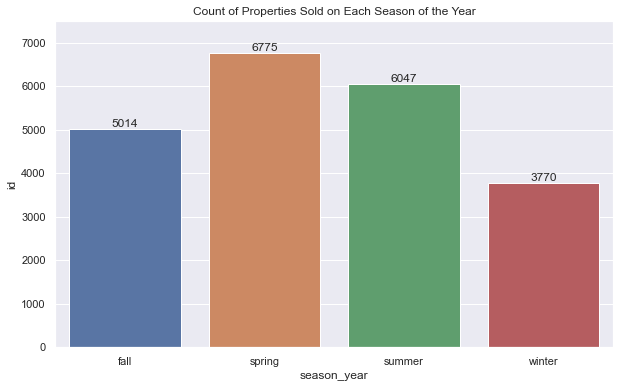

Properties sell 60.4% more, in summer than in winter


In [950]:
# creating a mean measure in a dataframe
aux = df2[['id','season_year']].groupby('season_year').count().reset_index()

# plotting the barplot
plt.figure(figsize=(10,6))
fig = sns.barplot(x= aux['season_year'], y= aux['id'], ci=None);
fig.bar_label(container = fig.containers[0],fmt="%d")
fig.set(title='Count of Properties Sold on Each Season of the Year')
fig.set_ylim([0,7500])
plt.show()

# creating the percentage measure
measure = ((aux.loc[2,'id'])/(aux.loc[3,'id'])-1)*100

print('Properties sell {}% more, in summer than in winter'.format(round(measure,2)))


### H7. In the winter, properties prices tend to be 20% lower than in summer, on average.


**False**

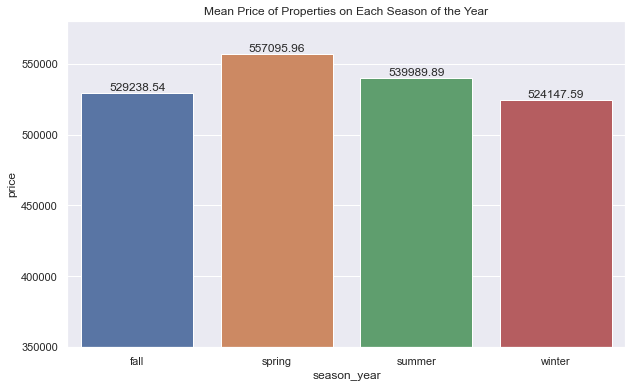

Properties prices are 2.93% lower, in winter than in summer


In [951]:
# creating a mean measure in a dataframe
aux = df2[['price','season_year']].groupby('season_year').mean().reset_index()

# plotting the barplot
plt.figure(figsize=(10,6))
fig = sns.barplot(x= aux['season_year'], y= aux['price'], ci=None);
fig.bar_label(container = fig.containers[0],fmt="%.2f")
fig.set(title='Mean Price of Properties on Each Season of the Year')
fig.set_ylim([350000,580000])
plt.show()

# creating the percentage measure
measure = (1-(aux.loc[3,'price'])/(aux.loc[2,'price']))*100

print('Properties prices are {}% lower, in winter than in summer'.format(round(measure,2)))

### H8. The number of bedrooms and bathrooms of a property has more effect on price than its total living area 

**False** 

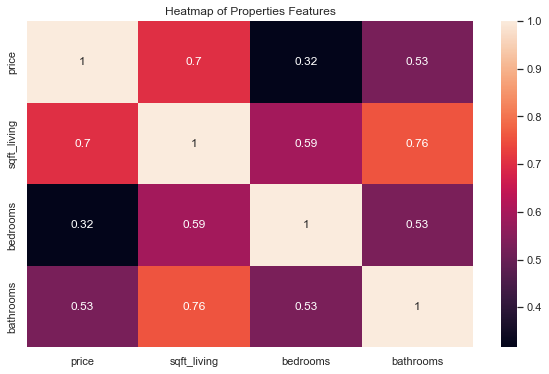

In [952]:
# creating the correlation dataframe
correl = df2[['price','sqft_living','bedrooms','bathrooms']].corr()

# plotting the correlation in a heatmap
plt.figure(figsize=(10,6))
fig = sns.heatmap(correl, annot=True);
fig.set(title = 'Heatmap of Properties Features');

The total living area of the property has more influence on its price than the number of rooms.

- The properties living area have a correlation of 0.7 with the price.
- Number of bedrooms and bathrooms have 0.32 and 0.53 of correlation with the properties prices, respectively.
- Number of bathrooms has more influence on the living area than the number of bedrooms.

### H9. Properties renovated after 2005 have their prices higher than the properties which were renovated before 2005 or than have never been renovated, on average.

**True**. On average, properties that were renovated after 2005 have higher prices.

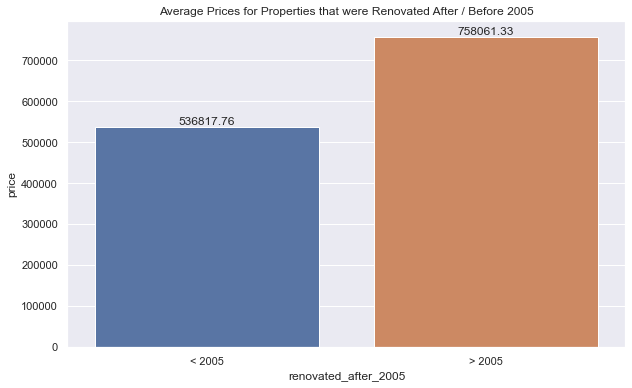

In [953]:
# creating the mean measures in a dataframe
aux = df2[['renovated_after_2005','price']].groupby('renovated_after_2005').mean().reset_index()
aux.head(10)

# plotting the barplot
plt.figure(figsize=(10,6))
fig = sns.barplot(x= aux['renovated_after_2005'], y= aux['price'], ci=None);
fig.bar_label(container = fig.containers[0],fmt="%.2f")
fig.set(title='Average Prices for Properties that were Renovated After / Before 2005')
plt.show()

### H10. Properties that have their total living area smaller than the 15 closest properties are cheaper, on average.

**True**

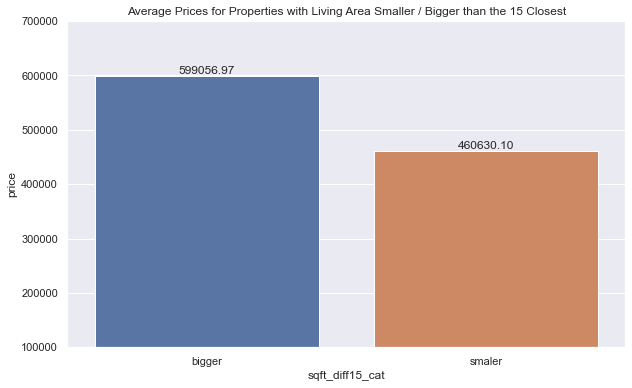

In [954]:
# creating the mean measures in a dataframe
aux = df2[['sqft_diff15_cat','price']].groupby('sqft_diff15_cat').mean().reset_index()

# plotting the barplot
plt.figure(figsize=(10,6))
fig = sns.barplot(data=aux, x='sqft_diff15_cat', y='price')
fig.set(title='Average Prices for Properties with Living Area Smaller / Bigger than the 15 Closest')
fig.bar_label(container = fig.containers[0],fmt="%.2f")
fig.set_ylim([100000,700000])
plt.xticks([True, False], ['smaler','bigger'])
plt.show()

## 3.2 Business Scenario

In [955]:
df3 = df2.copy()

### 1. The House Rocket's CEO wants to know which houses the company shall buy and their prices.

- It will be suggested that properties that have their prices lower than the median price of the region **and** are in good conditions be bought.

1. Data are grouped by region and the median prices are calculated. **(Section 2.6)**

2. Create condition: 
    - Properties which have their prices lower than the median price of their own region **and** are in good conditions (above 3) shall be bought
    - The ones with prices higher than the median of their region aren't buying recomendations

In [956]:
# picking columns
df3 = df3[['id','zipcode','price', 'season_year','median_price', 'median_s_price','condition','sqft_diff15_num','sqft_lot','sqft_living']]

# creating status column
df3['status'] = df3.apply(lambda x: 'buy' if x['price'] < x['median_price'] and x['condition'] >= 3 else 'do not buy' ,axis = 1)

In [957]:
tb1 = df3[['id','zipcode','price','median_price', 'condition']].copy()
tb1.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,7129300520.0,2976800796.0,3352402236.0,1180002378.0,1180500070.0,179000350.0,7878400135.0,7887200390.0,179003055.0,8073000495.0
zipcode,98178.0,98178.0,98178.0,98178.0,98178.0,98178.0,98178.0,98178.0,98178.0,98178.0
price,221900.0,236000.0,252500.0,299000.0,335000.0,194000.0,355000.0,294000.0,210000.0,700000.0
median_price,278277.0,278277.0,278277.0,278277.0,278277.0,278277.0,278277.0,278277.0,278277.0,278277.0
condition,3.0,3.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


### 2. The CEO also wants to know when the company shall sell the properties suggested and for what price

- It will be suggested that properties with prices lower than the median price of their region **and** season that were priced, be sold with 30% increasing, while the ones with higher prices be sold with a 10% price increasing

- As seen ealier on section 3.1, in hypothesis 5 and 6, properties sell more in Spring and also are more expansive. In view of this condition, the sale price recommended is a minimum requirement 

1. Data are grouped by region **and** season. The median prices are calculated. **(Section 2.6)**

2. Create condition: 
    - Properties which have their prices lower than the median price of their own region and season, shall be sold with a 30% increasing on their prices
    - The ones with prices higher than the median of their region and season shall be sold with a 10% increasing on their prices

In [958]:
# filtering properties suggested
df3 = df3[df3['status'] == 'buy'].copy().reset_index()

# sell price column
df3['sale_price'] = df3.apply(lambda x: 1.3*x['price'] if x['price'] > x['median_s_price'] else 1.1*x['price'], axis=1)

# profit column
df3['profit'] = df3.apply(lambda x: x['sale_price'] - x['price'], axis=1)



In [959]:
tb2 = df3[['id','zipcode','season_year','median_s_price','price','sale_price','profit']].copy()
tb2.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,7129300520,2976800796,3352402236,179000350,179003055,3352402250,399000195,2328800130,7129300420,185000161
zipcode,98178,98178,98178,98178,98178,98178,98178,98178,98178,98178
season_year,fall,fall,fall,fall,fall,fall,fall,fall,fall,fall
median_s_price,284000.0,284000.0,284000.0,284000.0,284000.0,284000.0,284000.0,284000.0,284000.0,284000.0
price,221900.0,236000.0,252500.0,194000.0,210000.0,119900.0,200000.0,220000.0,258000.0,261000.0
sale_price,244090.0,259600.0,277750.0,213400.0,231000.0,131890.0,220000.0,242000.0,283800.0,287100.0
profit,22190.0,23600.0,25250.0,19400.0,21000.0,11990.0,20000.0,22000.0,25800.0,26100.0


### 3. Should House Rocket do a house renovation to raise the sale price? What could be the renovation suggestions? How much is the price incresing for each renovation option?

- As seen earlier on section 3.1, in hypothesis 9, properties which have been renovated since 2005 are more expansive than the one which have not.
- In hypothesis 10, is showed that properties smaller than the 15 properties closest to them are cheaper, on average
- The correlation seen in hypothesis 8 shows that:
    - Total living area has the highest impact on price 
    - Number of bathrooms has more impact on price than number of bedrooms
    - Low impact of number of bedrooms on price.
#
- In view of these facts, it will be suggested one option of renovation for properties with a smaller living area:
    - Increase living area by the difference between living area and living area from the 15 closest properties. On condition that the new area doesn't exceed 25% of the original living area (This condition prevents prices from rising too high)


 

1. Properties with renovation conditions are indicated by column renovation_space. Homes with no space for renovations are indicated with 0. **(Section 2.6)** 
2. Since the minimum space needs to be 80 square feet, create condition:

    - If the property has its total living area smaller than the average size of the other 15 properties closest, then it will be suggested the option 1
    - If the property is bigger than the average size of the other 15 closest properties, then it will be suggested the option 2
#
3. The price increasing will be:
    - Option 1: Price + extra square feet price. (It is assumped that sqft_price includes the costs with the construction)
    
 

In [960]:
# defining which properties should be renovated
df3['renovation'] = df3.apply(lambda x: 'yes' if (x['sqft_diff15_num'] < 0)  & ((x['sqft_lot']-x['sqft_living']) > 0) else 'no', axis= 1 )

# defining renovation area in order to set the price increasing
df3['renovation_area'] = df3.apply(lambda x: x['sqft_diff15_num']*(-1) if (x['renovation'] == 'yes') and (x['sqft_diff15_num']*(-1) <= 0.25*x['sqft_living']) else
                                             0.25*x['sqft_living'] if (x['renovation'] == 'yes') and (x['sqft_diff15_num']*(-1) > 0.25*x['sqft_living']) else
                                             0, axis=1 )

# defining price increasing
df3['sqft_price'] = df3.apply(lambda x: x['price']/x['sqft_living'], axis=1)
df3['price_increasing'] = df3.apply(lambda x: x['sqft_price']*x['renovation_area'], axis=1)

# defining new sale_price and profit
df3['sale_price_renovated'] = df3.apply(lambda x: x['sale_price'] + x['price_increasing'], axis=1)
df3['profit_renovated'] = df3.apply(lambda x: x['sale_price_renovated']-x['price'], axis=1)


In [963]:
tb3 = df3[['id','zipcode','price','renovation','sale_price','sale_price_renovated','profit','profit_renovated']].copy()
tb3.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,7129300520,2976800796,3352402236,179000350,179003055,3352402250,399000195,2328800130,7129300420,185000161
zipcode,98178,98178,98178,98178,98178,98178,98178,98178,98178,98178
price,221900.0,236000.0,252500.0,194000.0,210000.0,119900.0,200000.0,220000.0,258000.0,261000.0
renovation,yes,yes,yes,no,no,yes,yes,yes,yes,no
sale_price,244090.0,259600.0,277750.0,213400.0,231000.0,131890.0,220000.0,242000.0,283800.0,287100.0
sale_price_renovated,274178.1,263230.8,340875.0,213400.0,231000.0,161865.0,270000.0,253578.9,345819.2,287100.0
profit,22190.0,23600.0,25250.0,19400.0,21000.0,11990.0,20000.0,22000.0,25800.0,26100.0
profit_renovated,52278.1,27230.8,88375.0,19400.0,21000.0,41965.0,70000.0,33578.9,87819.2,26100.0
